<a href="https://colab.research.google.com/github/Venture-Coding/SUNY-Buffalo-ML-and-self-learning/blob/main/Regression/Decision_tree_pruning_with_ccp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Classifier 

The DecisionTreeClassifier :class: has multiple options to prevent the tree from overfitting via regularisation, such as :

1.   min_samples_leaf
2.   max_depth
3.   minimum sample split  and few more...

We also have Cost Complexity Pruning using the ccp_alpha parameter as well as minimal_cost_complexity_pruning methods available to prevent overfitting. 

Let's try out the Cost Complexity Pruning in this code. Higher the ccp_alpha, greater is the number of nodes pruned. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
X, y = load_breast_cancer(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = DecisionTreeClassifier (random_state=0) #instantiate
clf.fit(X_train, y_train)                     # fit the training data

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred). #understand the accuracy which we later try to improve

0.8811188811188811

[Text(561.9857142857144, 513.4, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(358.7142857142858, 453.0, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(239.14285714285717, 392.6, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(143.48571428571432, 332.2, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(95.65714285714287, 271.8, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(47.828571428571436, 211.39999999999998, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(143.48571428571432, 211.39999999999998, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(95.65714285714287, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(191.31428571428575, 151.0, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(143.48571428571432, 90.59999999999997, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(95.65714285714287,

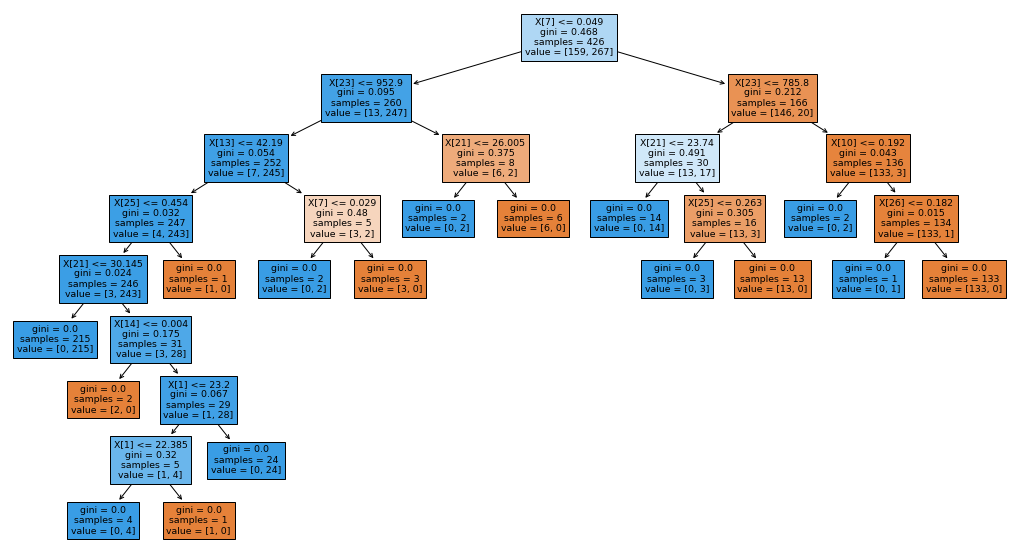

In [ ]:
from sklearn import tree
plt.figure(figsize=(18,10))

tree.plot_tree(clf, filled = True) #visualize it to see how complex the tree is in this instance

Lets try to prune the tree now!


In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train) #we arent giving any sample weight, so all will be equally weighted.
ccp_alphas, impurities = path.ccp_alphas, path.impurities

The clf.c_c_p_path returns 
    
    ccp_path : Bunch
        Dictionary-like object, with attributes:

    ccp_alphas : ndarray
        Effective alphas of subtree during pruning.

    impurities : ndarray
        Sum of the impurities of the subtree leaves for the corresponding alpha value in ccp_alphas.

Of these, we unpack the the Alphas and Impurities to work on further.

In [ ]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

Let's run through all these once to understand which one gives the best classifier tree.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas :
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha) #instantiating classifier with each ccp_alpha value respectively
    clf.fit(X_train, y_train)     #fitting training data on each classifier
    clfs.append(clf)              #saving all classifiers in the list
    print('No. of nodes in last tree is : {} with ccp_alpha{}'.format(clfs[-1].tree_.node_count,ccp_alpha))


No. of nodes in last tree is : 31 with ccp_alpha0.0
No. of nodes in last tree is : 27 with ccp_alpha0.0022664723976040134
No. of nodes in last tree is : 21 with ccp_alpha0.004647426339100881
No. of nodes in last tree is : 19 with ccp_alpha0.004659799593581376
No. of nodes in last tree is : 17 with ccp_alpha0.005633802816901408
No. of nodes in last tree is : 15 with ccp_alpha0.007042253521126761
No. of nodes in last tree is : 13 with ccp_alpha0.007841938420144537
No. of nodes in last tree is : 11 with ccp_alpha0.009114019793328328
No. of nodes in last tree is : 9 with ccp_alpha0.011443661971830986
No. of nodes in last tree is : 7 with ccp_alpha0.018988002086593604
No. of nodes in last tree is : 5 with ccp_alpha0.023141627543035996
No. of nodes in last tree is : 3 with ccp_alpha0.03422474765119576
No. of nodes in last tree is : 1 with ccp_alpha0.3272984419327777


We can see that as we keep increasing the CCP_ALPHA parameter, the number of nodes are decreasing and so is the tree depth, as well.

Also, since the last element in clfs and ccp_alphas only gives a trivial tree with single node, we remove it. 

In [ ]:
clfs = clfs[0:12]
ccp_alphas = ccp_alphas[0:12]
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475])

### **Accuracy Comparison**

Now let's try to see which of these ccp_alpha values gives us the maximum accuracy. That way we shall get a clearer picture of exactly how deep shall we go in the classifier tree.

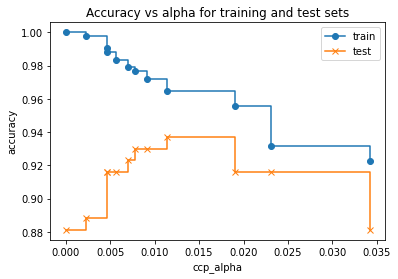

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs] #storing all training scores for each of the classifier stored
test_scores = [clf.score(X_test, y_test) for clf in clfs] #same for the test scores

#plotting it 
fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and test sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker='x', label="test", drawstyle = "steps-post")
ax.legend()
plt.show()

So *at 0 value* of ccp_alpha --> the model is so *overfitted* that it has *training accuracy of 100%*, while test acc stands at 88%

The graph gives a reliable estimate of what value ccp_alpha must take in order to optimize the values of test and train accuracy. 
In this case, accuracies stay similar for alpha values from 0.01 to 0.019, falling at 0.02.

Thusm we can safely keep ccp_alpha at 0.015 (or anything from 0.012 - 0.019), to get the **max test accuracy** of around **94%** amongst all, while also have a **good training accuracy** at above **96%**

In [ ]:
#Lets try at 0.015
clf_final = DecisionTreeClassifier(random_state=0, ccp_alpha=0.015)
clf_final.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.015, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
pred = clf_final.predict(X_test)
accuracy_score(y_test, pred)

0.9370629370629371

Let's visualize the newly made tree.

[Text(418.5, 475.65000000000003, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(209.25, 339.75, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(104.625, 203.85000000000002, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(313.875, 203.85000000000002, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(627.75, 339.75, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(523.125, 203.85000000000002, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(418.5, 67.94999999999999, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(627.75, 67.94999999999999, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(732.375, 203.85000000000002, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

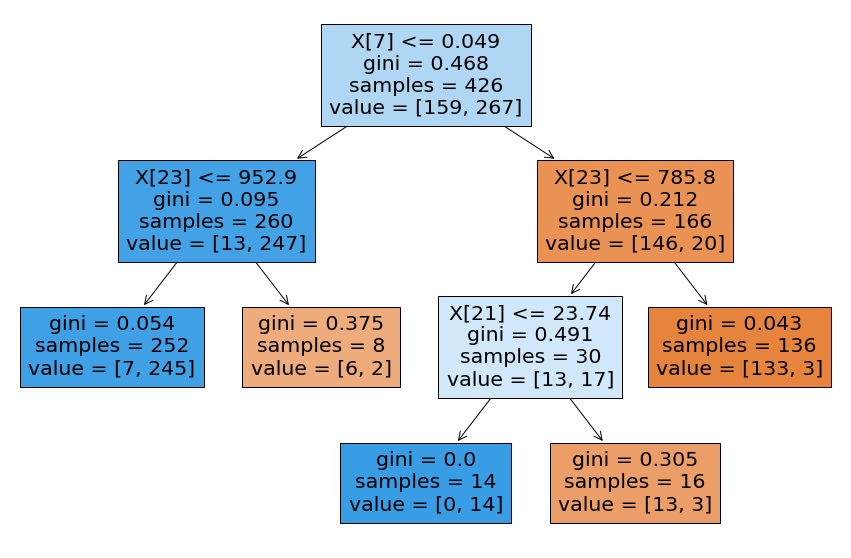

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf_final, filled=True)

Depth reduced, leaves reduced yet accuracy increased as overfitting reduced!